In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [158]:
def func_signal(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)


def generate_offsets(n, scale):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=scale, size=n)

def generate_custom_offsets(n, tau1=3.5, tau2=3.7):
    """
    Generate n random offsets using the custom distribution combining two exponential distributions.
    
    Args:
    - n: Number of offsets to generate.
    - tau1: Parameter for the first exponential term (related to rate1).
    - tau2: Parameter for the second exponential term (related to rate2).
    
    Returns:
    - offsets: An array of generated offsets.
    """
    
    # Calculate the rates (inverse of tau)
    scale1 = tau1
    scale2 = tau2
    
    # Generate samples from the exponential distributions
    offsets1 = generate_offsets(n, scale1)
    offsets2 = generate_offsets(n, scale2)
    
    # Combine the samples as described
    combined_offsets = (offsets1 + offsets2)

    return combined_offsets

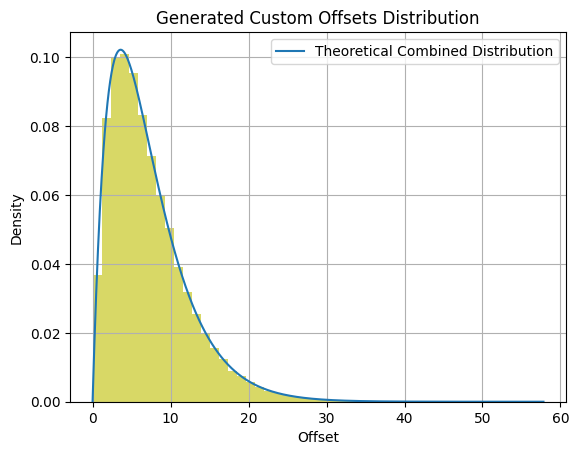

In [159]:
# Example usage
offsets = generate_custom_offsets(100000)

# Plot histogram of generated offsets
plt.hist(offsets, bins=50, density=True, alpha=0.6, color='y')

# Plot the theoretical combined distribution for comparison
x = np.linspace(0, np.max(offsets), 1000)
y = ( ( (1 / 3.5) * (1 / 3.7) ) / ( (1 / 3.5) - (1 / 3.7) ) ) * (np.exp(-x / 3.7) - np.exp(-x / 3.5)) # La PDF de la suma sale de hacer la convolución y es la Hypoexponential distribution
plt.plot(x, y, label='Theoretical Combined Distribution')

plt.xlabel('Offset')
plt.ylabel('Density')
plt.title('Generated Custom Offsets Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
def export_data_combined(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_combined.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_combined(n_photons):
    random_offsets = generate_custom_offsets(n_photons)
    print(random_offsets)
    t_values = np.linspace(0, 120, 3000)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    
    for offset in random_offsets:
        individual_values = func_signal(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_combined(t_values, summed_values, n_photons)


[7.29537012]


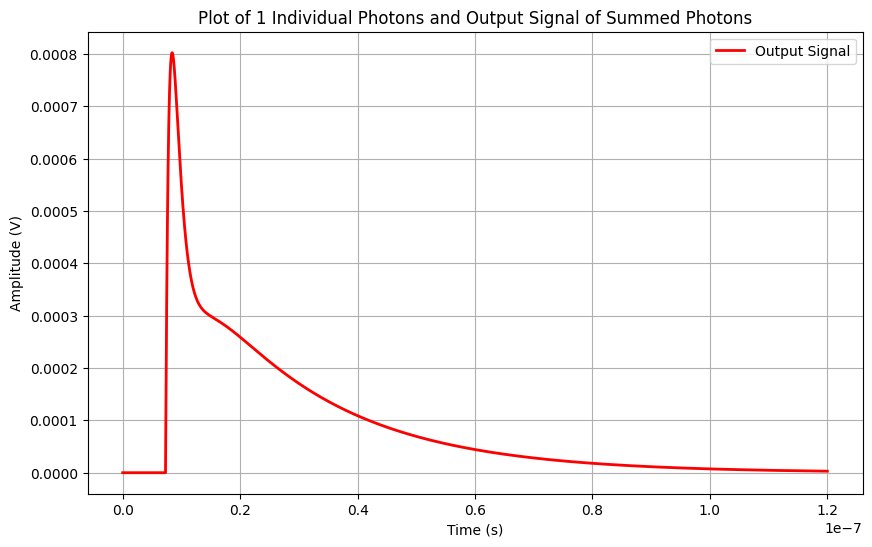

[1.72943363 1.54199706]


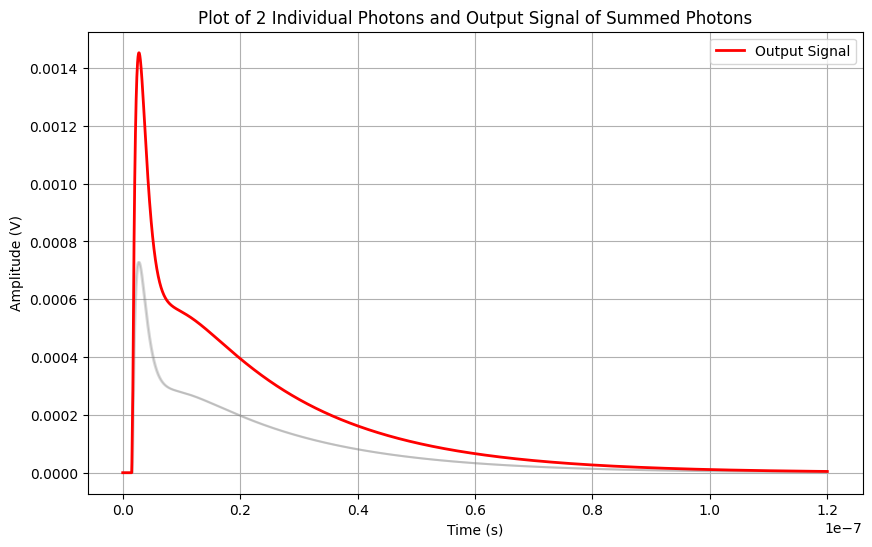

[4.93200435 3.39934359 1.57238456]


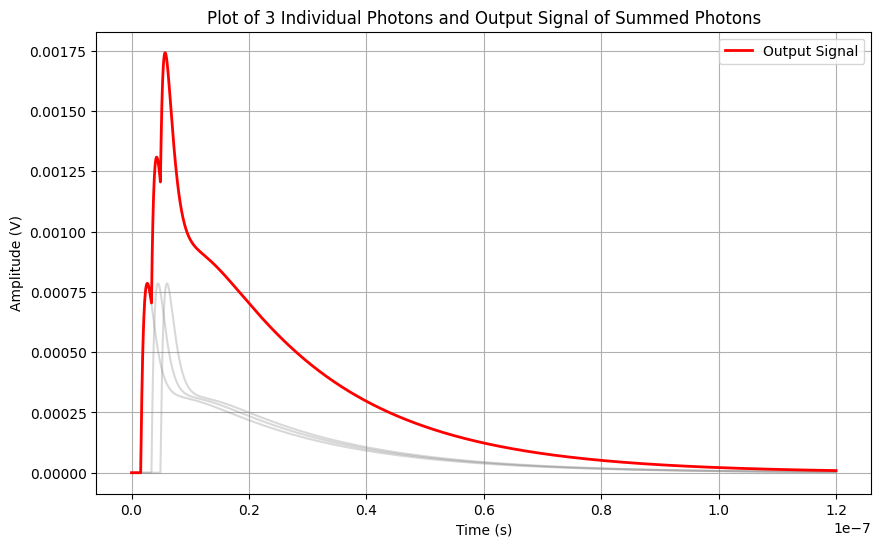

[6.67907934 0.61378687 1.29121129 1.40770343]


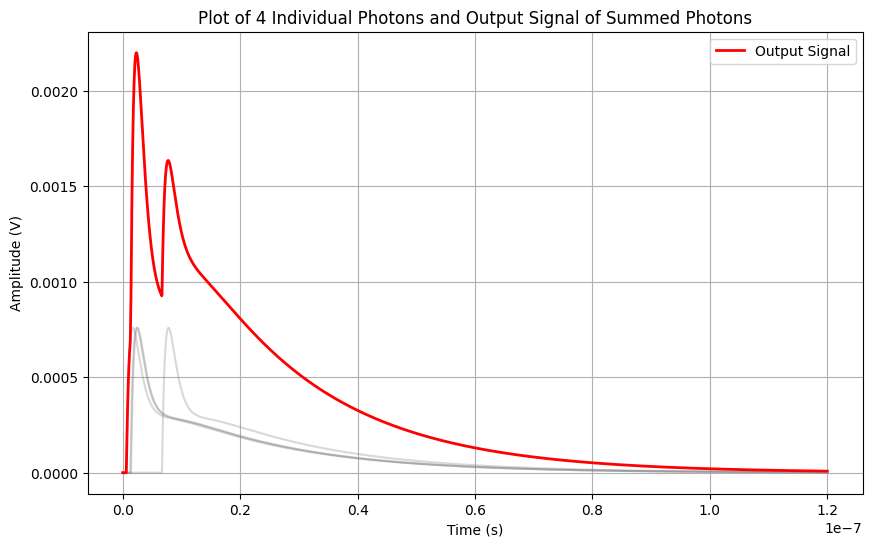

[3.7869128  3.48132799 2.94431942 3.98019419 5.4780973 ]


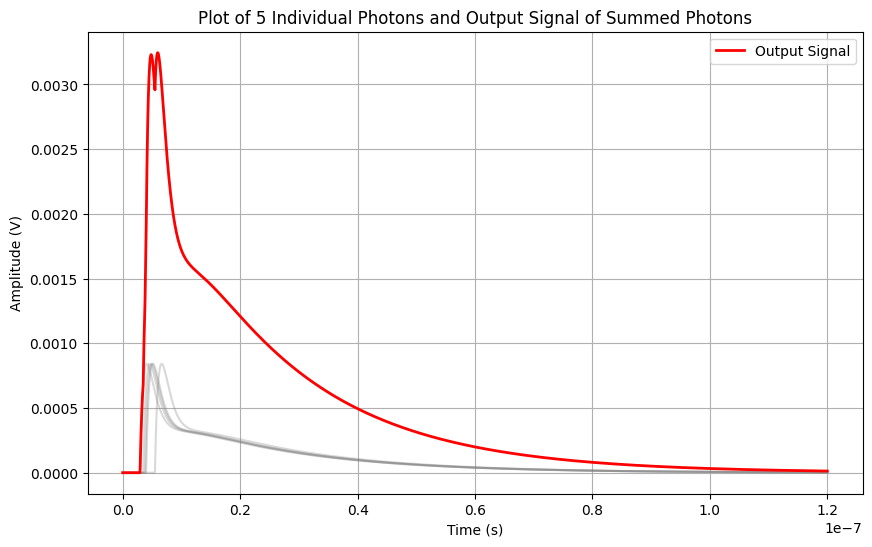

[4.15117844 0.34274082 0.63234458 6.25426662 1.1848636  2.34181679]


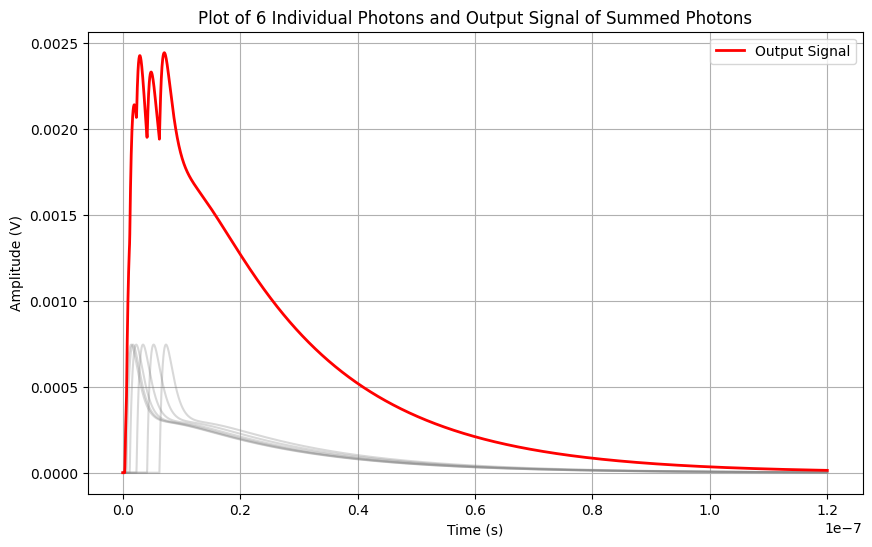

[ 2.01866986 19.35633477  6.16072162  1.3924949   3.01243332  1.36867281
  3.2103566 ]


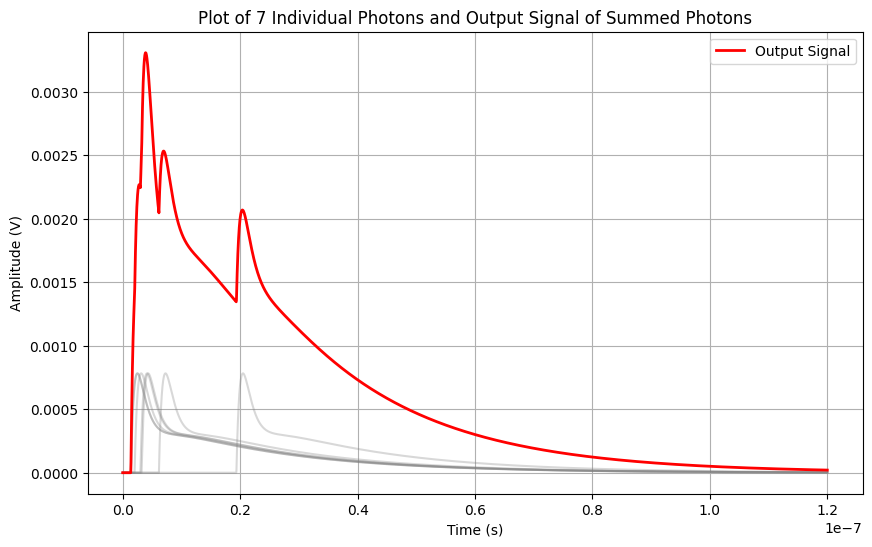

[0.94586276 1.0687767  2.93783655 3.60825994 5.52670362 4.11910391
 3.28984189 2.80871436]


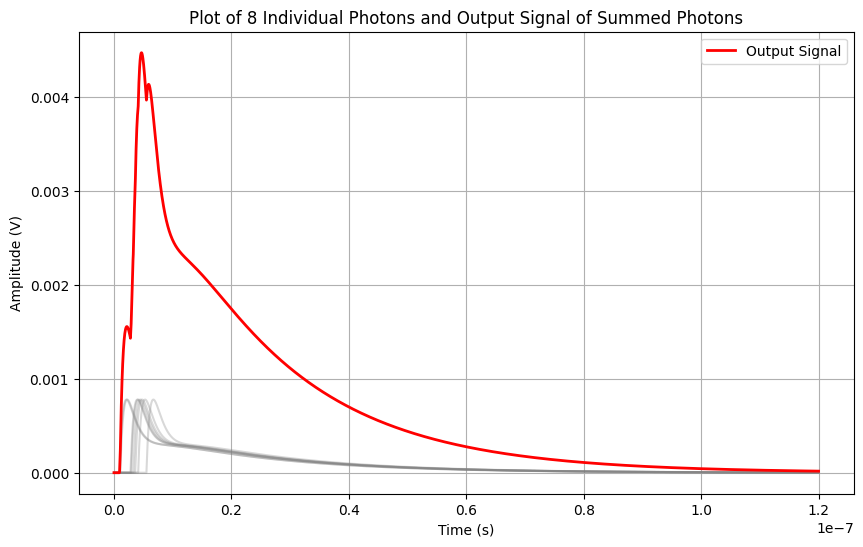

[3.36709477 0.98593649 1.99747553 6.64325058 2.69199601 2.97122706
 0.89127831 0.55587344 4.35775744]


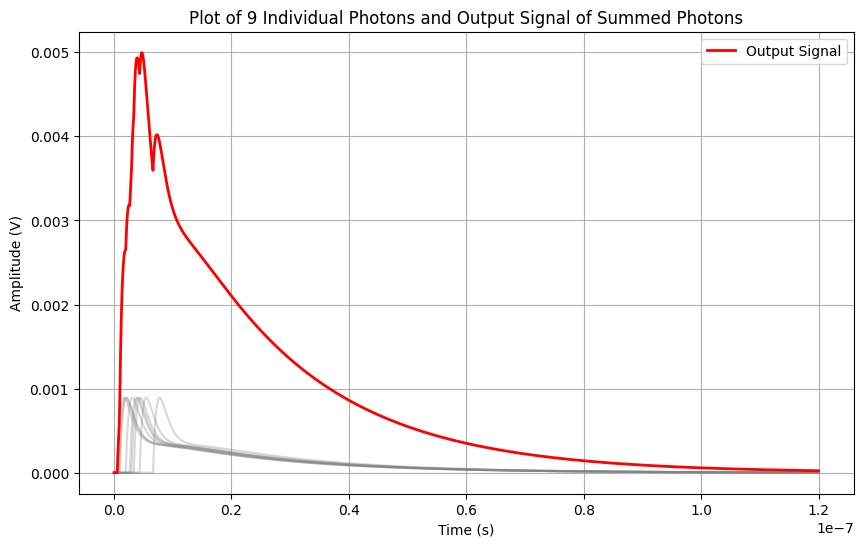

[0.86101924 0.84661617 4.67674251 1.39127801 3.21912318 4.50862255
 0.58430442 0.75515261 0.64492643 4.1011581 ]


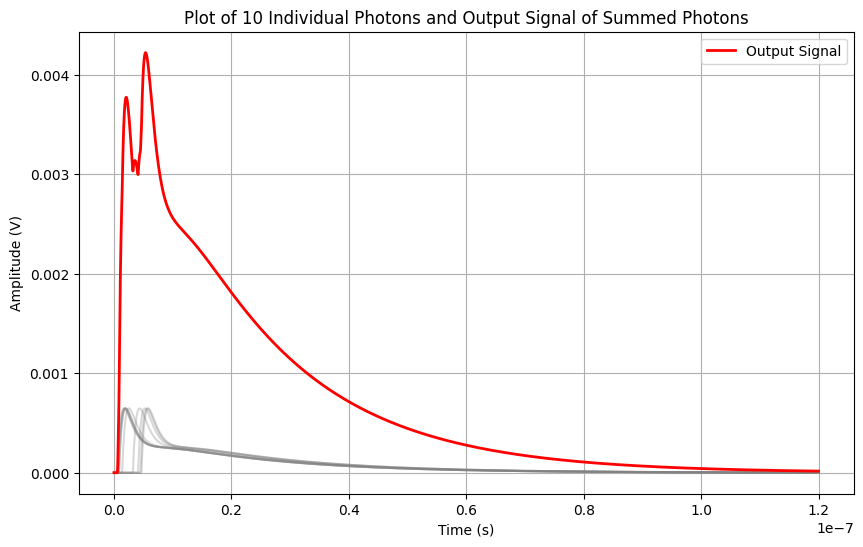

[5.80968546 6.43358473 0.67789721 3.88310715 2.22065657 6.2043608
 1.90887517 1.32127058 3.95888701 5.96119355 4.28995752]


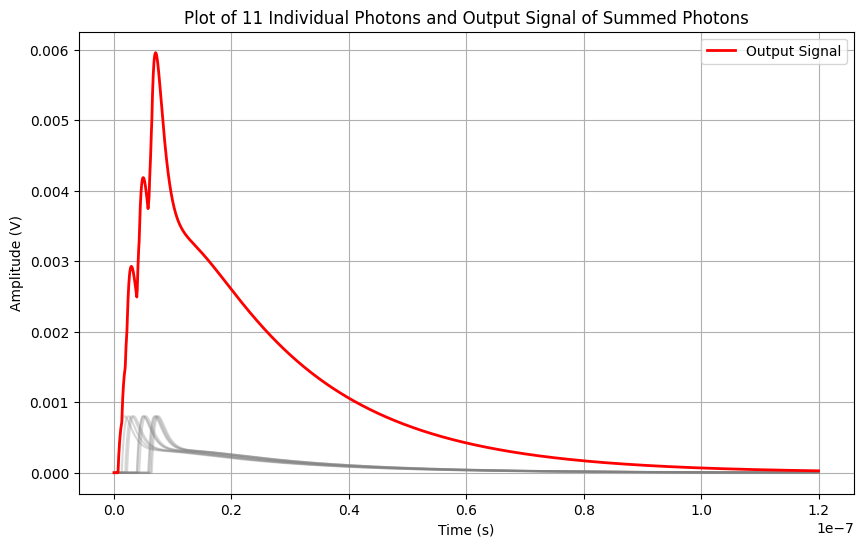

[2.45654037 1.14511692 4.65671219 1.9890919  0.6751632  3.34702219
 9.83264677 4.72762529 1.5487528  4.45609665 5.73444344 1.17487853]


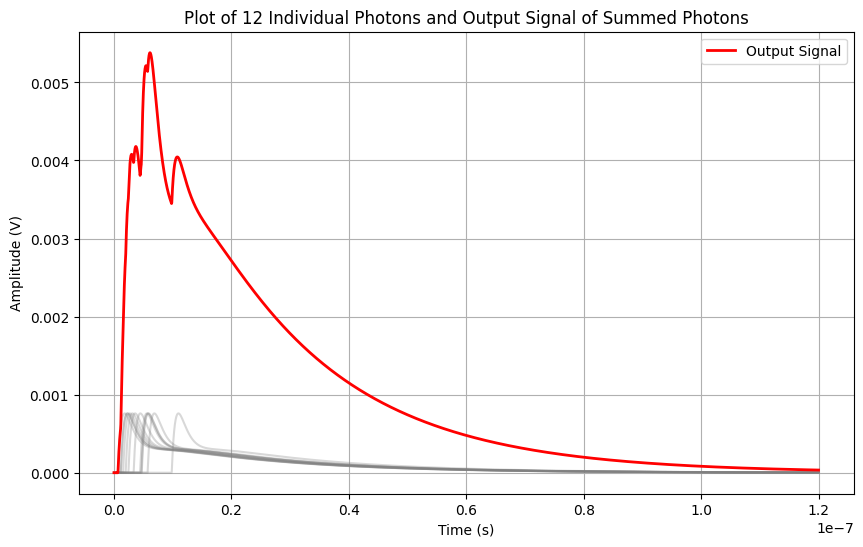

[ 3.36755479  2.40274039  1.85772453  4.29448436 13.14376202  2.01232765
  3.15550891  1.43055814  5.7952544   3.77055219  1.72234469  2.07249868
  3.98652108]


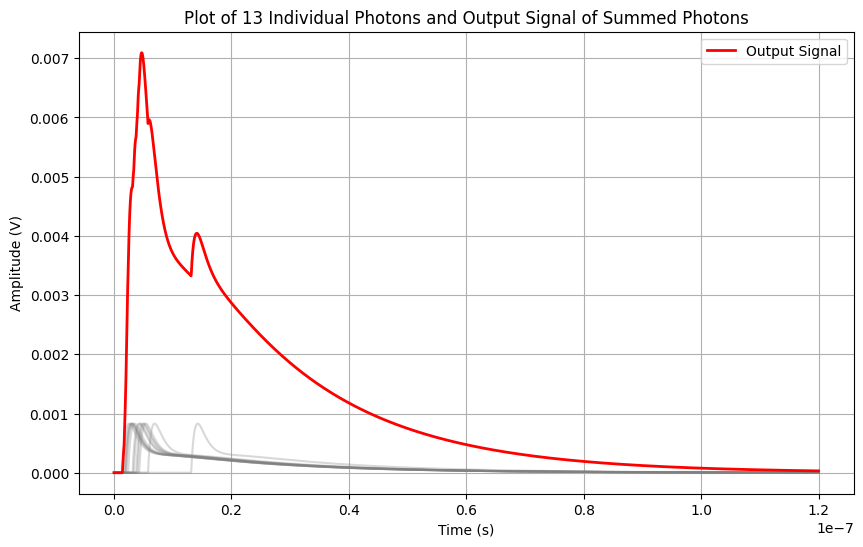

[3.65303424 0.41573815 1.55500233 5.06249059 4.07880993 0.9211539
 5.58749079 2.73563632 2.45901964 0.43797329 2.53780405 3.47754428
 2.46378164 5.44617654]


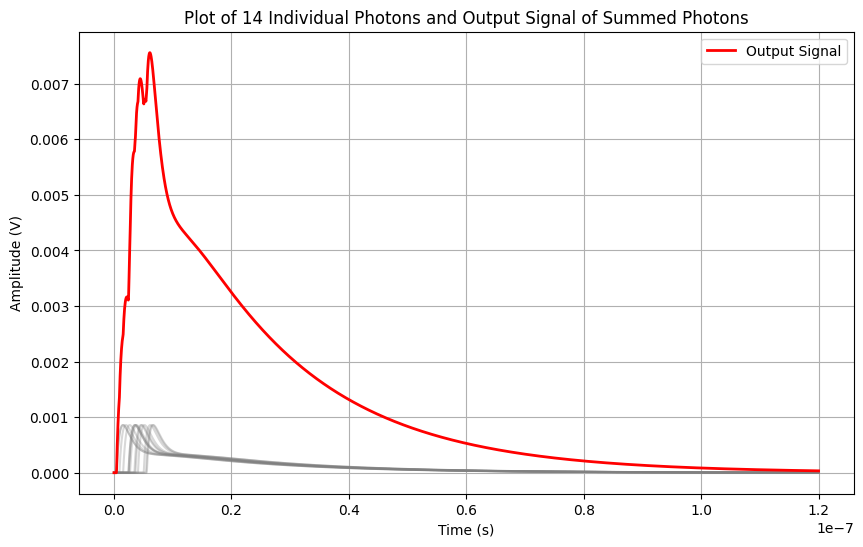

[5.24409247 6.37513353 2.23190237 0.6987373  1.91151893 2.67455129
 5.58319221 8.75359005 8.02808431 3.21780203 3.95139185 0.67182488
 1.68348241 4.63005207 2.09142413]


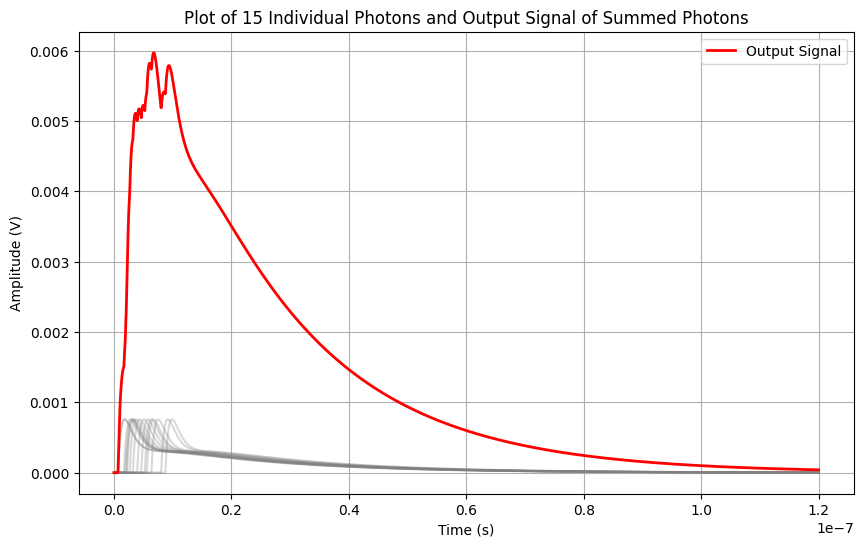

[4.364062   3.3462567  0.61467779 4.74904926 2.36535665 3.11543225
 1.53385291 6.0306713  1.39105971 2.1077381  0.56894196 7.58148402
 3.32095127 1.62513967 2.98636214 1.45444325]


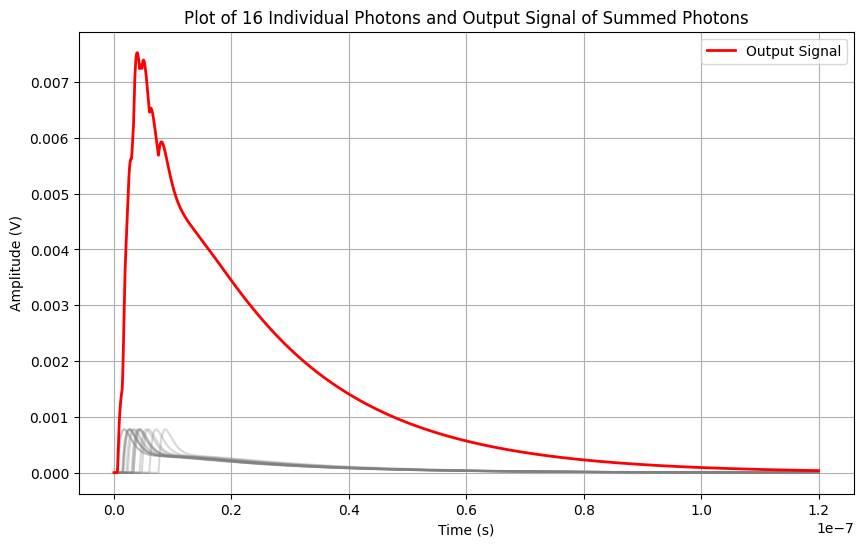

[5.73526773 1.54677764 3.46768231 5.72182621 2.02395048 1.29677006
 3.76177847 5.24899983 4.60440881 8.11177588 0.83900444 4.12357255
 4.32180863 1.86206663 4.30338504 2.81203881 2.88561972]


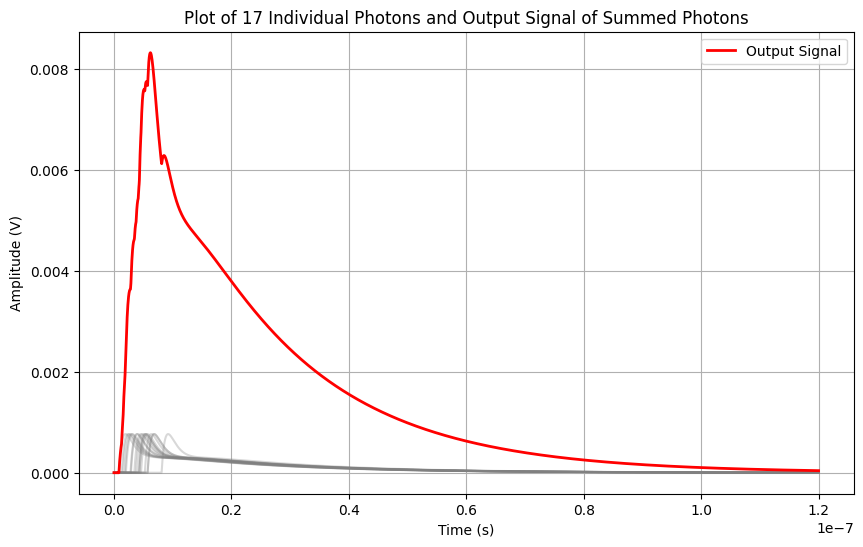

[13.09722595  6.03678878  1.98026147  3.38065918  2.40101766  1.20283725
  2.76331661  1.79212242  1.06887423  2.09772238  4.48641298  3.65926783
  1.44328464  2.34627824 10.90437765  1.54452097  3.00906743  3.14770214]


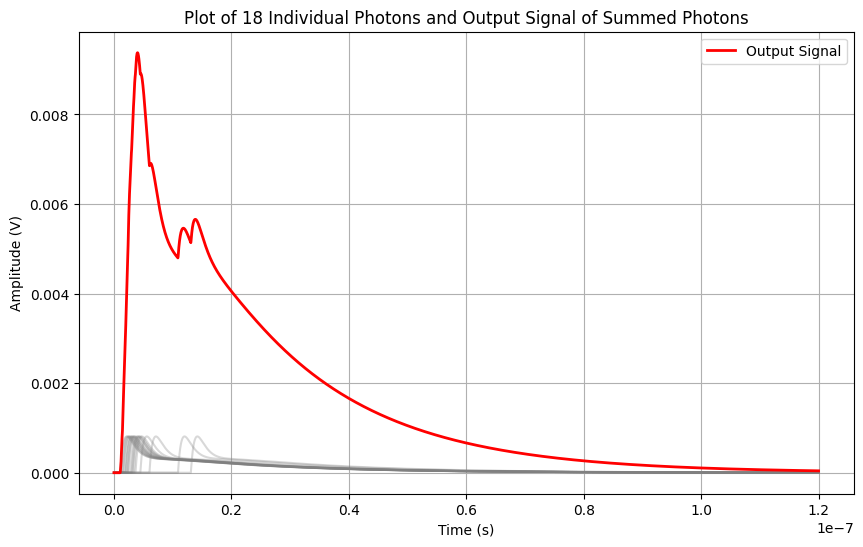

[0.74065611 4.24101276 0.66736314 7.38341581 5.93187385 2.33458003
 6.84474742 4.12369693 3.1113271  7.11284951 7.28736134 1.5777894
 1.76262862 2.09094137 4.94025985 3.56264914 3.26359656 6.97779227
 6.73617304]


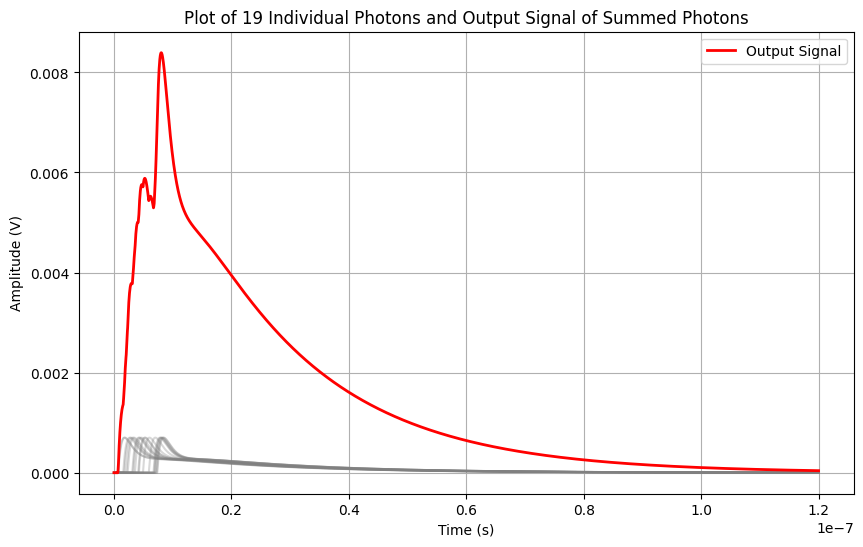

[0.46732224 2.06166125 4.60488331 1.11596987 0.84494965 2.23537477
 4.51162545 2.29017893 5.59987081 9.15223697 0.12499588 4.76199981
 3.25886988 5.20217525 3.51229375 2.33986005 2.17951201 6.93647159
 3.48973948 0.88495471]


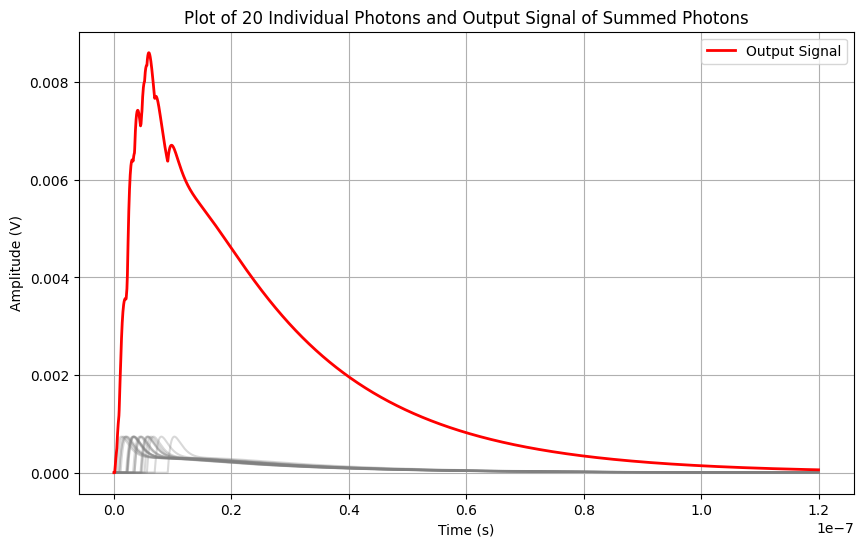

[4.58757811 1.59957509 2.90044918 6.09825758 2.75560175 5.77435389
 2.16656002 3.23377155 0.65452209 4.62255291 6.00728519 3.98392852
 6.9386834  3.63521631 5.07423588 2.65695246 3.50486873 1.80731522
 5.33185084 6.13946991 0.10312725]


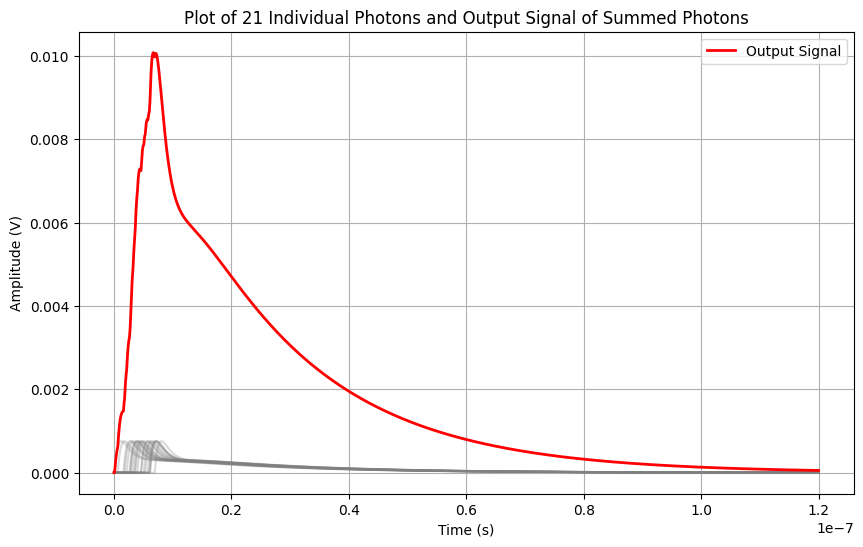

[ 2.39933539  4.48687396  7.05629958  2.30367413  3.23406168  3.22210722
  4.43841739  0.78796716  6.20834218  2.5498535   3.18749178  0.20209329
  1.15850021  3.07656375  2.50102852  4.63648058  0.33806938  0.60352733
  1.60623234  2.23145675  1.17857753 10.04810409]


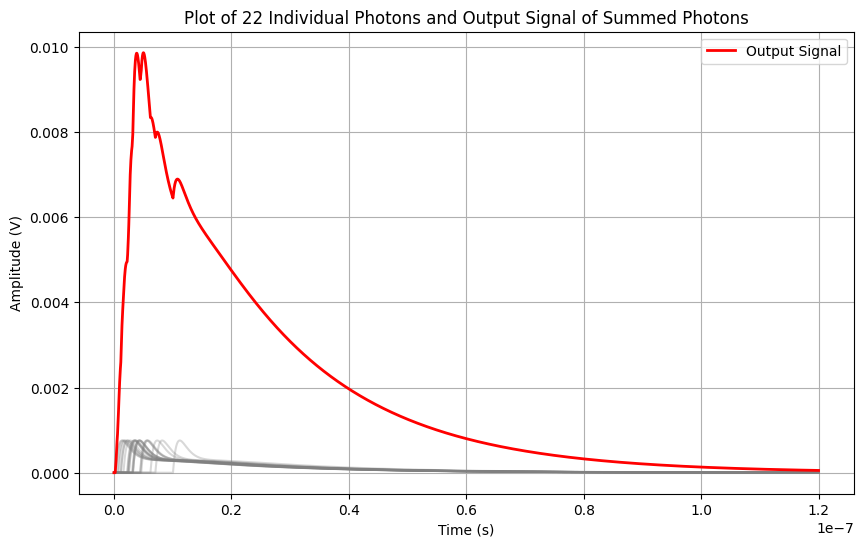

[ 0.55669052  0.55542702  1.00311877  2.34468565  3.57057417 11.78456099
  4.32894464  3.63803377  0.64889949  5.23884543  3.30003597  1.31101129
  1.96702885  2.35824083  1.65068946  0.74758638  4.3953649   6.04322978
  1.96072573  3.96378851  3.77474394  4.37658397  5.50622858]


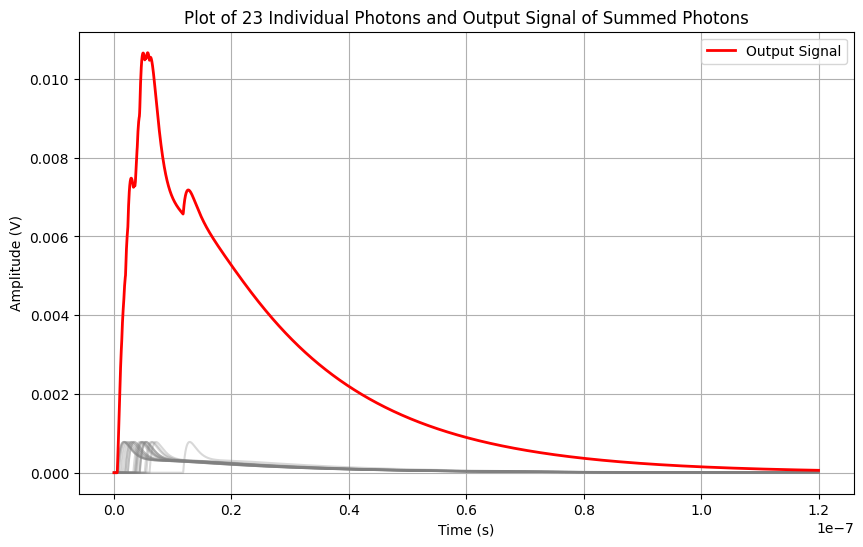

[ 9.77889681  5.93889302  0.97963728  1.44146695  5.15372337  6.18781875
  4.25729909  3.01593854  1.35939653  3.96974514 10.32581418  3.64651004
  1.46111234  3.9389348   2.10258787  1.92923226  1.72725935  2.03987356
  4.83414153  2.08201991  1.21819946  3.41682869  4.5383846   3.14888021]


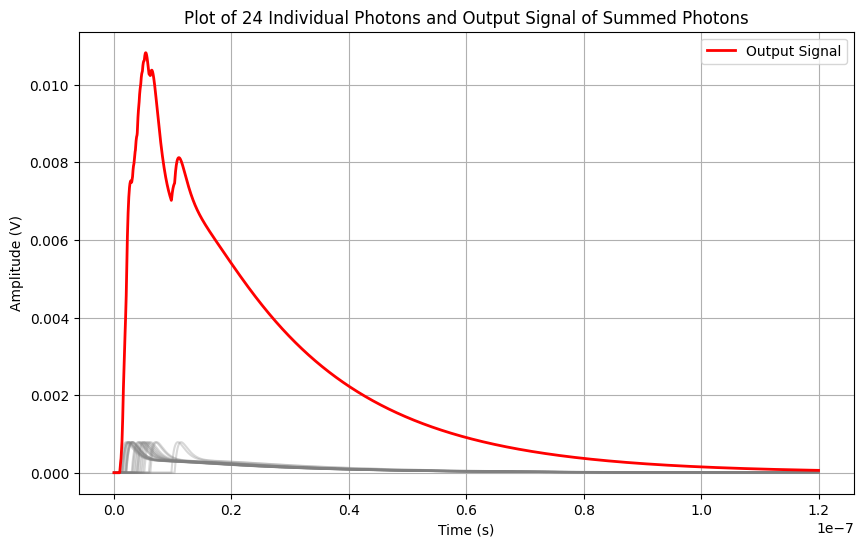

[5.12050539 3.40453484 2.52043654 3.97576158 8.43756942 3.52445572
 3.07199676 2.15528427 4.83679002 7.16987822 1.56690652 8.68917812
 2.51752242 1.61781685 2.5681058  2.26028018 3.75992419 1.72595971
 4.77281037 5.9894578  0.78412587 1.01171263 1.34205138 3.90120731
 0.69198619]


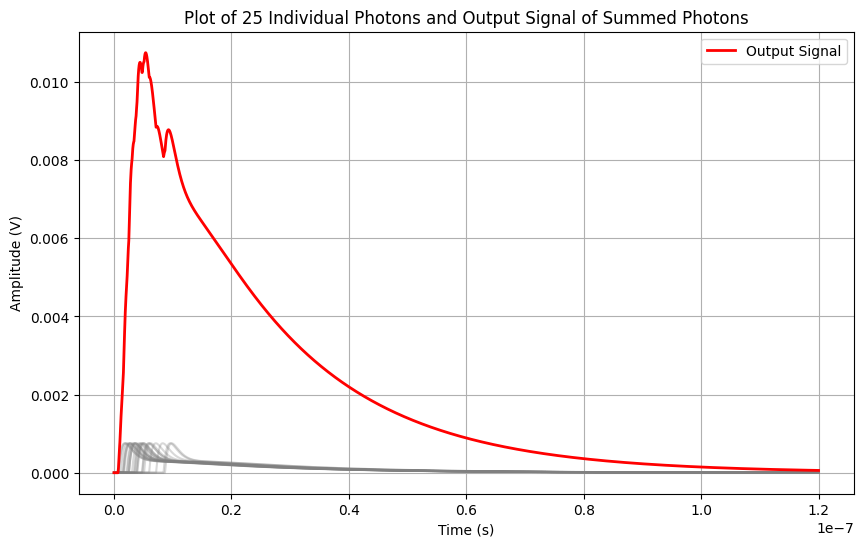

[1.07464413 5.65585975 1.74909647 2.93899582 2.47253101 0.9698191
 4.36467808 0.66488375 6.39673637 3.98451416 4.02351911 5.25751744
 0.49101282 5.13806572 3.4114978  1.25087645 1.40649138 1.59382824
 6.62095719 1.97259941 4.92693659 4.49245474 0.88316226 1.78269675
 3.60066635 5.7838617 ]


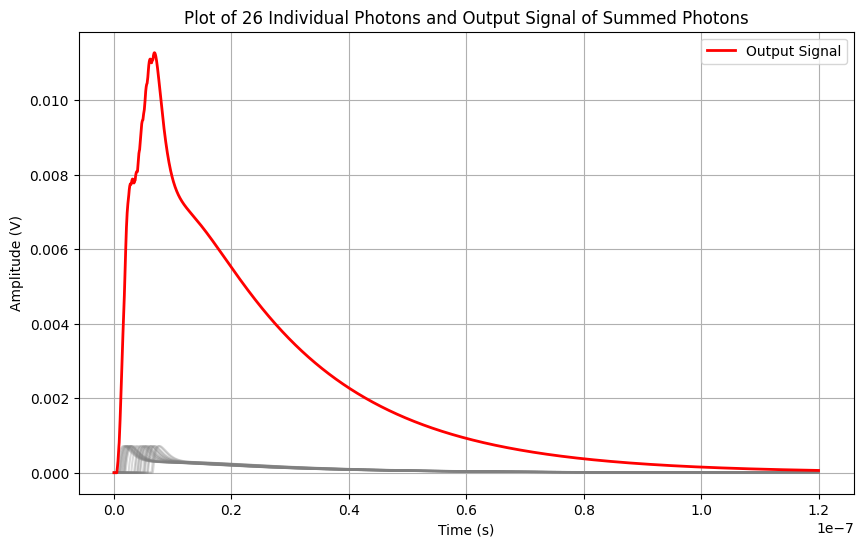

[1.23248895 1.97790132 2.68819249 4.05703303 4.019791   0.51382095
 4.08356719 2.03922189 9.92063893 3.41303321 5.72953048 0.84213114
 0.50533375 4.65679412 1.54357617 1.84525965 2.75970428 4.68596153
 2.3180379  2.96692178 4.53787474 7.23506118 1.96884694 0.70133159
 1.35642489 1.5297598  6.84319577]


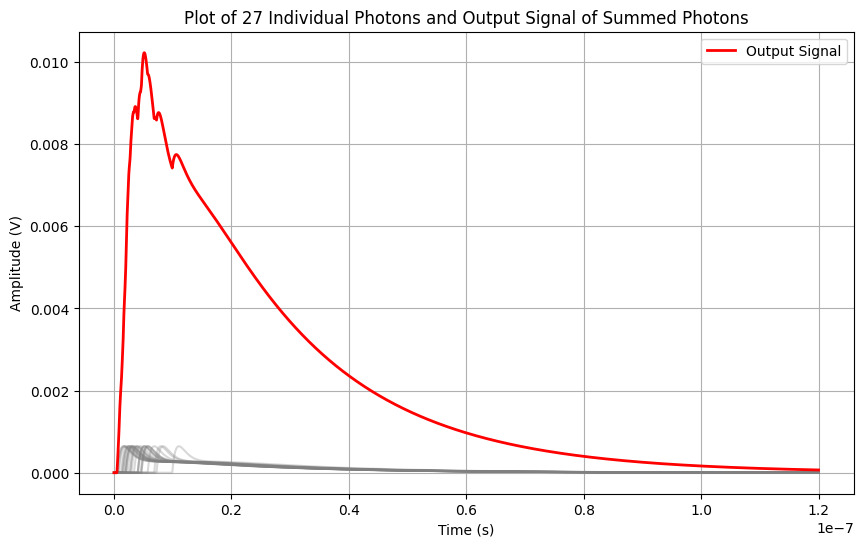

[ 1.68445066  5.99101613  5.27205703  2.05026893  1.07265279  0.35692844
 15.53442372  1.33857844  4.2795945   3.39169177  8.97583479  6.7517598
  2.21170027  0.28009338  2.1818974   2.58846738  4.51386082  2.41834564
  3.90532772  1.34390934  4.34132433  2.12475865  1.52537314  2.72751025
  5.12872183  0.73064994  1.23536136  1.91106074]


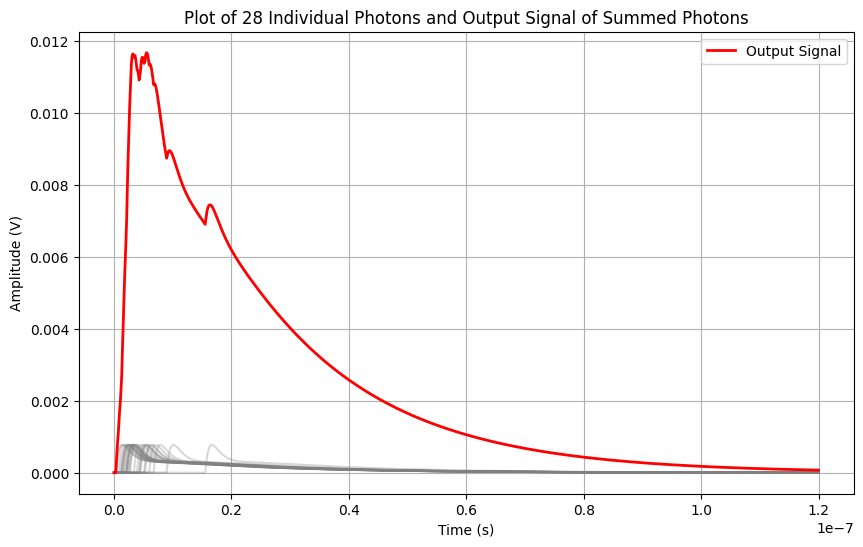

[ 0.99560455 11.99382601 12.2188138   3.89707261  5.03791305  3.29083637
  4.5553722   3.64135855  6.42853104  2.14361393  3.11561254  4.59312574
  4.98166582  1.68263829  1.44051557  3.60075122  1.669836    2.53902819
  2.75517149  8.34719082  5.33349263  2.03931207  2.87391683  3.41163554
  7.0647497   1.34984176  1.4701866   3.04141732  5.83116434]


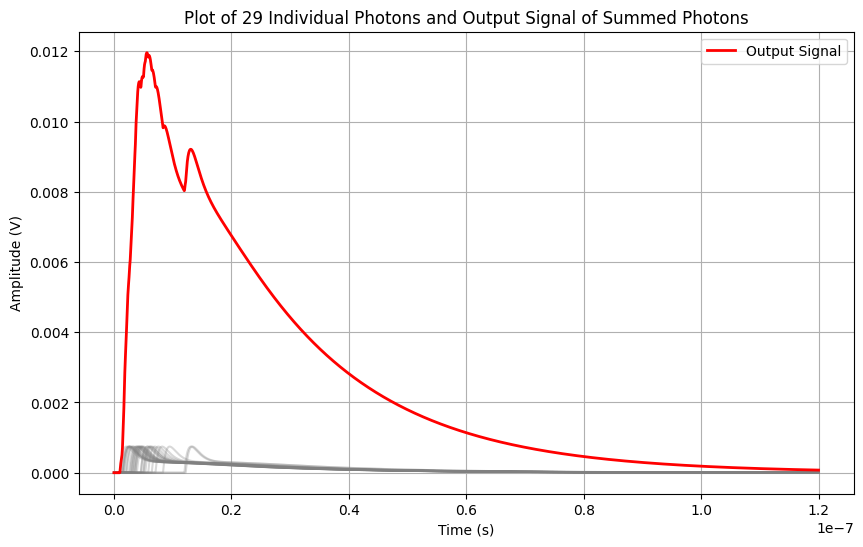

[3.0061285  0.42437643 6.5163142  5.4203762  2.16543995 1.347813
 1.99323159 3.04083379 3.48510707 5.89979524 1.91328223 0.57353044
 1.49716172 2.07131187 2.58132298 0.24334515 8.28847945 8.67278204
 2.33906134 3.17267693 4.16460685 3.75277008 5.40515404 4.02438598
 2.66947469 6.3652899  4.19378158 0.80599722 5.30738486 5.98523012]


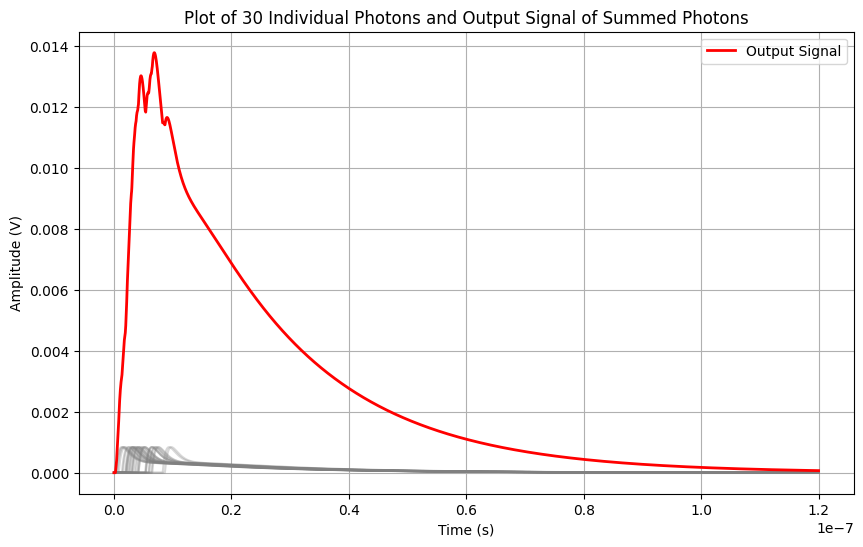

[ 6.64195091  6.04527428  4.41336341  7.34543994  7.58812473  3.71093598
  9.53629969  8.16762841  2.42243936  1.03826402 11.95275972  3.67939268
  2.50124489  0.78906737  1.00181716  0.98482245  4.33392172  3.16514569
  2.05548816  4.11787112  1.88189451  6.08167452  3.15923422  0.69389219
  2.33172433  2.31142457  2.87407635  3.2694638   1.45737356  1.65747465
  0.40427266]


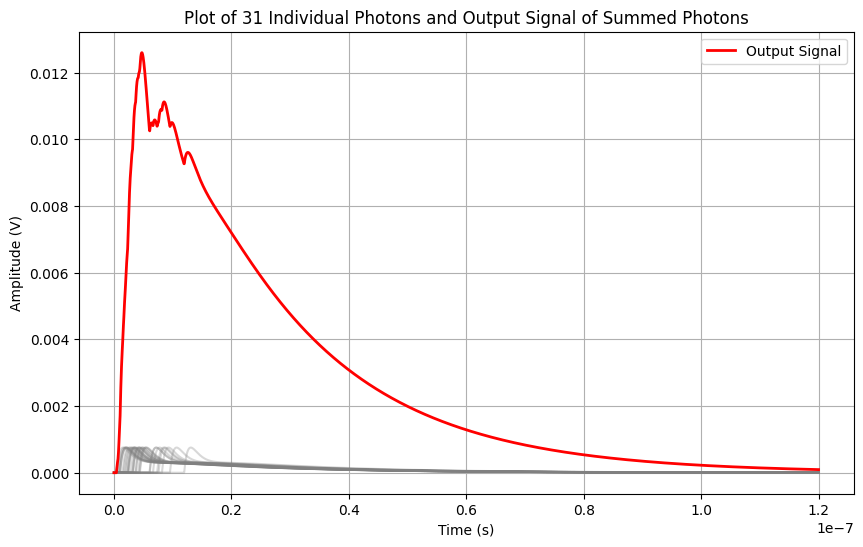

[2.03692549 2.54455122 0.2721217  1.97753974 3.49861079 1.62130648
 6.36725658 1.86179984 1.97841102 1.13505841 0.75476744 2.18547515
 0.97001792 5.47410692 5.96397433 0.94488628 0.52216356 3.68464981
 1.34760808 2.46234879 3.33353874 3.39292041 3.35258826 2.42549962
 5.86383926 5.68100234 1.15903835 4.3919144  3.19471394 6.88451593
 2.97173858 3.30563498]


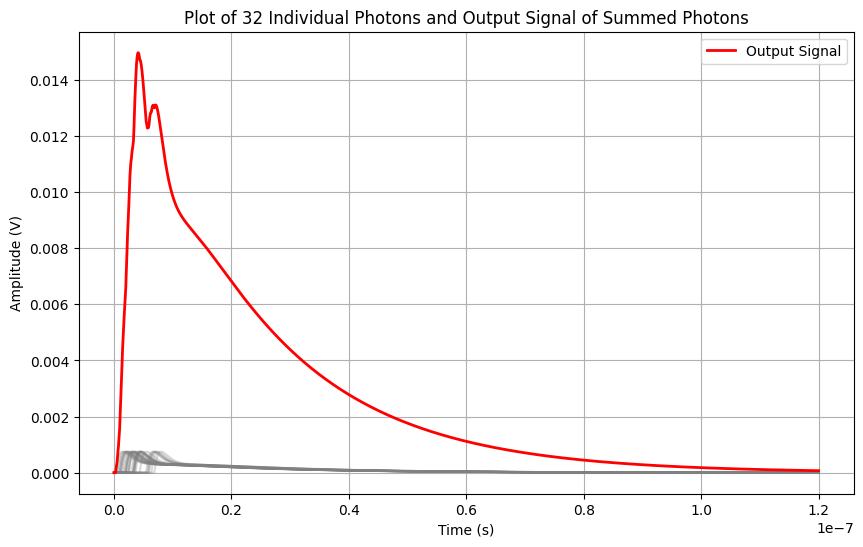

[2.24529469 7.09088358 6.50741113 3.38645997 0.60859474 4.6728045
 3.86290238 1.6645799  2.18531035 1.80546412 3.31892271 0.64738908
 1.12884749 3.14750174 2.09186253 3.74717983 1.6691555  5.80366492
 3.89949506 2.99543755 5.24423469 8.90375236 1.8147539  1.01699593
 1.87489015 0.43097074 2.61711699 3.46004656 0.76844368 6.65125979
 3.18976432 5.38974681 0.84961362]


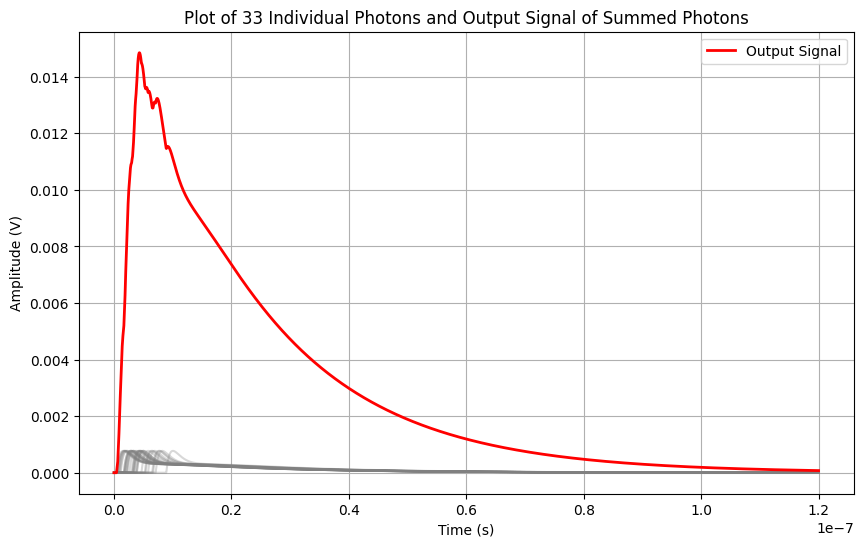

[ 9.14041918  2.38982957  0.86009595  1.11745289  2.47000092  2.91680931
  0.624099    6.02240078  5.47117299  4.63235503  0.21685933  6.50829318
  7.24005437  1.23206828  3.90526284  8.83932388  3.18611604  1.92612004
  3.02093169  4.28674064  0.19496699  2.56429582  1.403016    2.04019321
  0.8483381   1.14771871  2.06233086  3.14334505  5.75656516  5.37882521
 14.96168639  0.93444128  1.14040944  8.17540033]


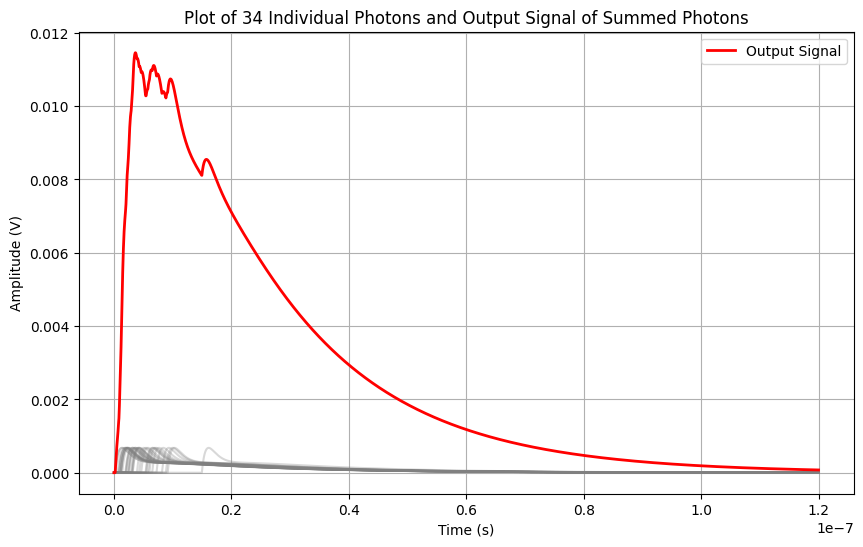

[ 1.71431754 10.75567198  2.87409278  2.56062761  8.04742785  3.00950021
  6.09717619  2.3705289   3.66831018  2.96716436  2.21808703  1.41179866
  1.42357813  7.9069643   1.1403924   2.11164074  1.37576846  2.51117084
  1.60934756  7.01774324  4.22694122  3.55088317  3.09975227  3.4693144
  2.4561017   4.79373791  4.05452258  1.57076564  1.78980758  1.81624704
  7.60113179  3.71520322  1.40339887  0.92267284  1.22101279]


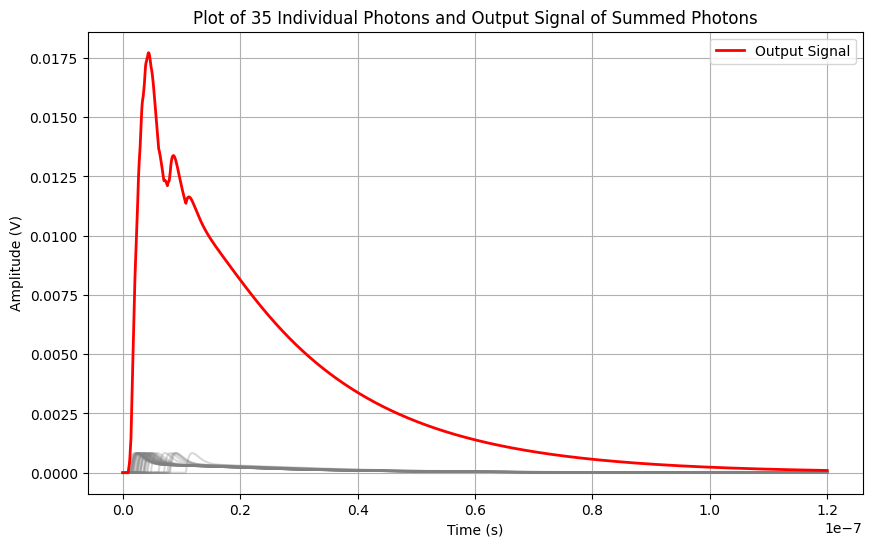

[2.87697906 0.53858771 2.40619802 1.95354012 3.59341344 2.02396383
 4.03881671 2.34401169 3.89193748 1.70057994 2.0618606  4.81696864
 2.62032123 1.1629175  1.18692317 0.63538579 3.39477499 3.74260679
 3.79010697 2.64604031 0.94744671 3.08826533 4.02555699 4.3662108
 4.97016945 1.94401958 3.4043437  2.46347457 3.54939969 3.28923014
 0.95642299 1.65774188 2.78460296 2.25750714 1.75930717 4.55984193]


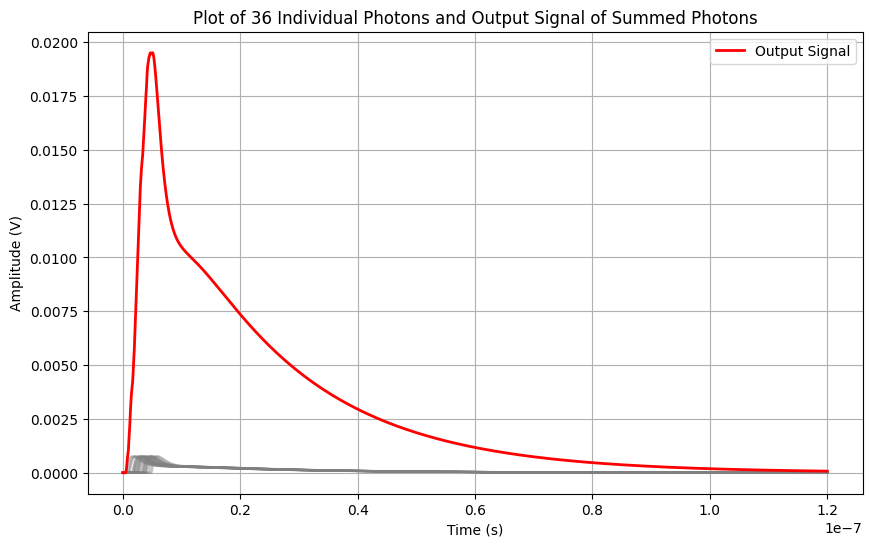

[ 2.418771   10.65977078  2.47189203  1.69708926  0.73746919  3.6786657
  2.06932841  1.43148994  3.78219644 14.87884098  3.79676422  2.39907215
  3.35140709  1.4295189   2.28824183  5.48775189  4.87446877  2.89251074
  5.09075878  7.9414089   5.34766089  2.09632782  2.06939018  0.52171551
  3.4283294   2.43023941 13.44610217  0.30123932  1.24151942  4.99245931
  1.68323911  1.49101504  3.09241325  3.53192751  3.54909715  2.26221985
  8.19890473]


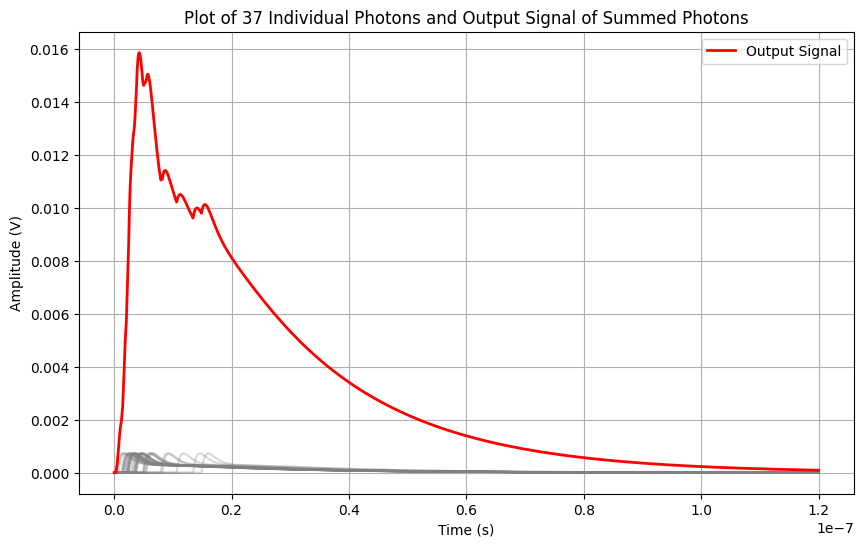

[ 0.72255465  4.8830618   1.06659112  3.96327805  2.71891579  1.74217328
  3.34213031  2.66582384  2.83211265  4.68963629  2.09472637  1.60165464
  3.33175448  3.88520999  2.0735782   2.79552903  4.4989164   3.58464132
  2.88603935  1.94818998  1.42659975  7.41979525  7.56858999  3.73613311
  0.3549097  13.71727555  1.84269506  1.22147141  0.58274116  5.58638053
  4.60589341  5.13641623  4.47605527  4.7910524  10.36228309  6.41805146
  1.01587016  6.11428862]


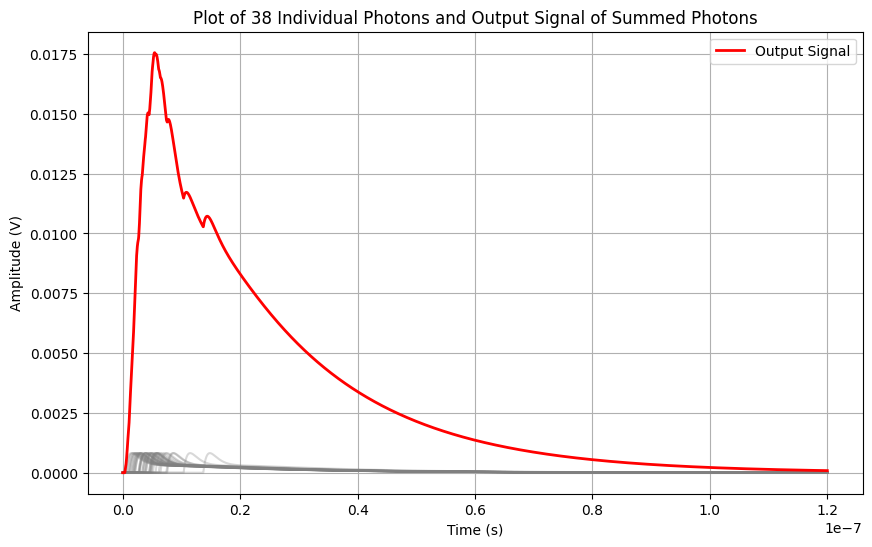

[ 2.07236893  2.96126162 10.33540474  1.19784364  4.51938256  3.38831246
  2.32223147  2.75395552  0.98564255  2.23991355  2.2144256   1.64830175
  3.53695211  2.20842263  7.9097058   0.28018314  5.1550993   1.10536831
  6.63568041  6.66190321  0.2140637   2.97670726  2.17225825  0.78684884
  0.31898837  3.7009254   0.46644912  1.33565181  5.21524542  3.97705741
  4.11602083  1.0137953   1.08199391  2.00362717  2.82941737  1.23326451
  0.89307318  6.7211499   2.93862122]


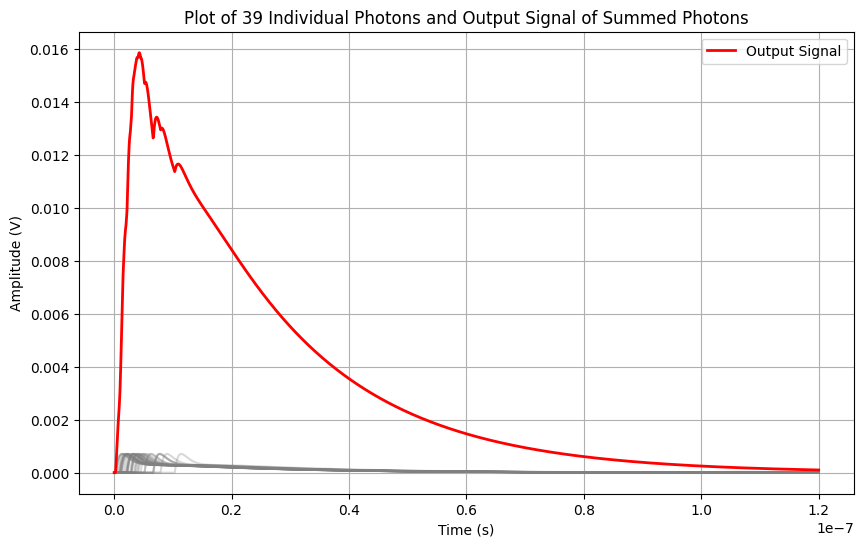

[2.35653776 6.20947721 3.92356914 2.88490471 1.09488829 2.91362121
 3.31802578 2.40883215 6.47300894 2.88078179 2.00244073 5.69379173
 2.92805001 4.96290802 2.61259442 2.76526654 0.48548506 2.03131391
 0.59925762 2.57247802 4.23540206 6.70476981 3.74644648 2.24480405
 1.0856667  1.87457543 1.94297348 4.59297508 6.65389213 2.08159189
 0.55544351 2.56420219 6.50058357 4.19980713 3.83610471 2.99752371
 1.32622039 0.04896724 3.51870283 8.11721607]


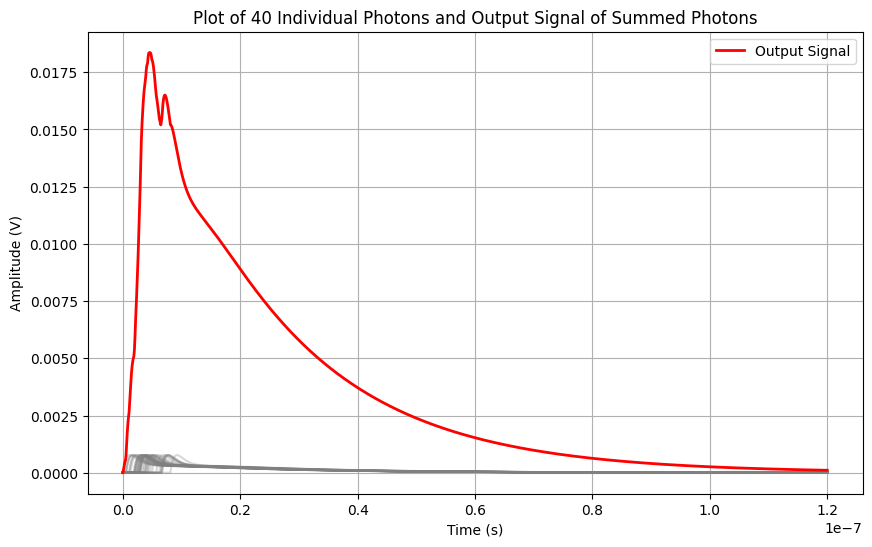

[3.55080432 4.9043831  1.96782018 1.65134547 6.33237261 1.68460272
 8.20922886 1.74674132 1.12516144 9.79806258 1.80861346 5.08631994
 0.42519149 1.05944587 1.75270326 0.50465418 0.59159375 2.87233626
 1.99485215 0.97983408 1.05141006 1.66597037 7.20511557 3.03751211
 5.96879657 3.91506044 0.74391053 3.94188323 2.30599056 1.3226641
 0.41074119 1.21559252 2.09999154 3.28325483 1.95544376 1.3142303
 6.37440827 0.6640121  3.5863929  1.56875789 3.57932379]


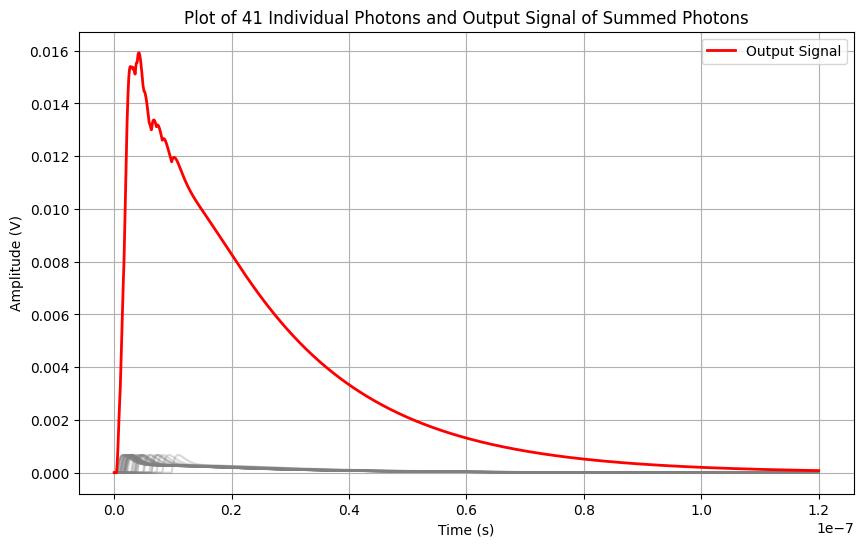

[0.79266575 0.45917862 1.65911431 2.67288293 2.59818641 3.03511177
 1.59913384 3.50859452 1.52663131 4.36820166 5.02064039 2.64505142
 7.93301992 4.11234969 1.95827213 3.3637014  8.50431144 4.32650534
 0.86658556 2.76317968 3.80937833 2.70974737 2.45669545 0.89370382
 2.9137078  1.59839264 4.38539431 4.35797151 2.09107735 2.96640643
 4.74475852 3.52382723 7.81081673 2.71887977 2.49677406 1.41661865
 3.52766969 3.06964356 6.03200373 2.96497154 1.13448869 2.96649435]


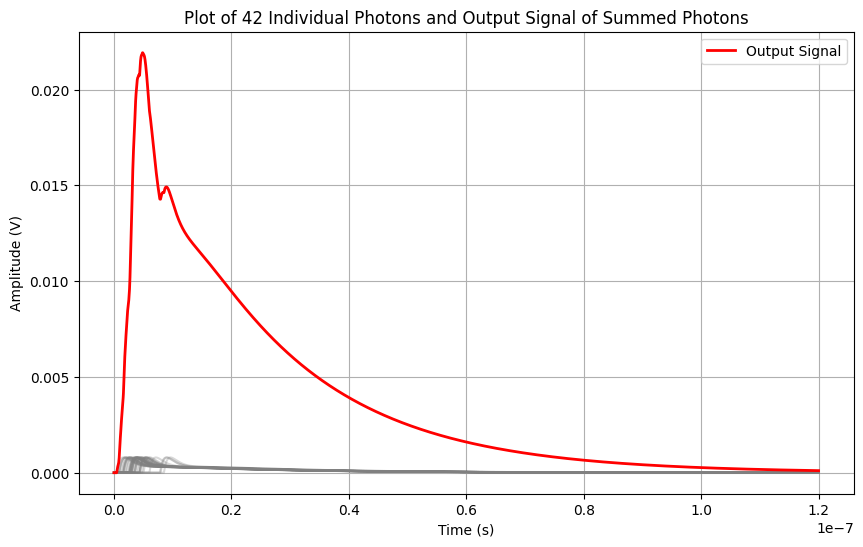

[2.44526627 5.89170589 2.0123372  7.61686782 2.05032766 0.17759097
 1.84076672 7.27507719 5.50134472 3.17814836 7.48650136 2.01618803
 2.59983649 3.85992726 0.83389716 2.96898182 4.25621559 4.59551595
 0.38656678 0.58080546 3.51171528 5.77329185 0.98039433 3.78122979
 1.99466235 1.5532744  2.5947882  5.52030351 1.16434175 0.96076401
 3.30042452 2.95692238 4.5587445  2.02123364 3.21295789 4.09642567
 4.43509067 2.46789615 4.75498252 2.6153468  5.01572927 1.73822023
 5.07166325]


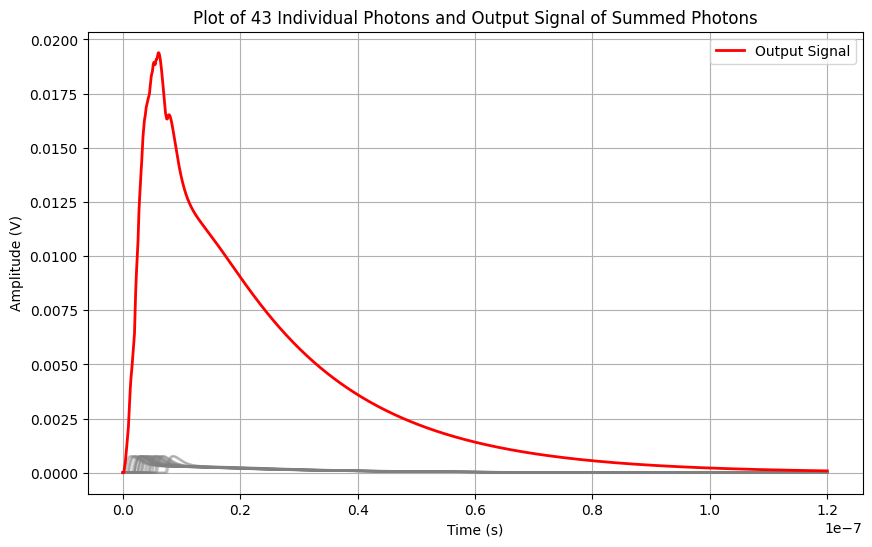

[ 3.57897628  4.8592186   4.45038955  1.14144638  4.40802494  1.2897332
  6.37134121  1.23341596  1.06067627  8.3986008   1.46266816  2.9866986
  0.75111547 10.11335129  0.96494716  2.37856434  3.74422597  3.04014001
  0.93183215  2.97878793  6.04596003  3.76470688  5.35224068  1.86942165
  4.71397724  3.51649237  3.58578313  1.80169301  0.47896447  3.01933696
  0.97703875  2.26573916  2.51020739  2.427388    3.72428678  4.43354614
  0.485925    2.25658197  1.38866084  1.13140549  5.69782244  3.86693149
  3.87440282  1.32681108]


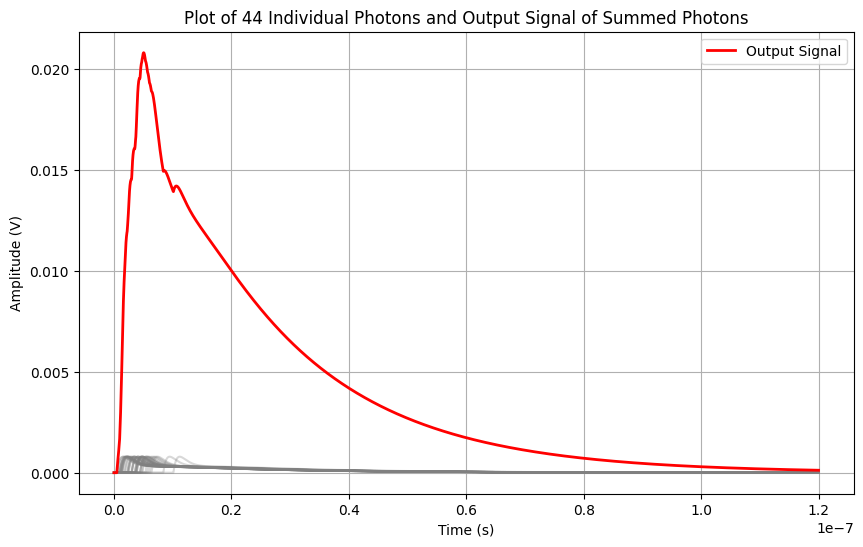

[ 7.11407719  4.51823525  4.99670965  6.27899281  1.56578137  3.29796667
  2.98286625  8.98731874  5.69364004  0.9391671   3.22463255  4.22513105
  1.79096752  1.84764807  2.13716     6.31740688  5.53876186  1.31929478
  7.11157863  4.60283592  5.40938188  3.49825118  5.79545333  1.33219818
  2.19876797  3.94871397  1.1825914   1.08819289  7.3340576   8.50061875
  3.53139454  4.30934605  3.5364324   8.54121472  5.2582602   4.38846773
  1.39629607  2.73122728  5.75271964  4.1204245   2.56430521  1.35604011
 11.54072166  1.2431151   8.36497478]


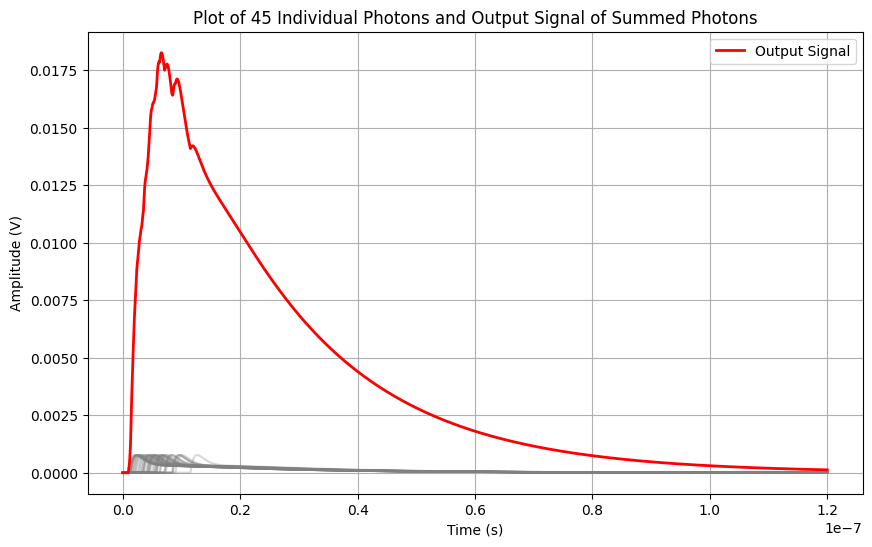

[10.68989061  5.40426149  2.13671812  1.64560083  1.71321535  1.50003535
  7.41276312  4.61014119  2.28380086  6.55014143  4.33407093  3.07093878
  3.37234491  6.06133164  1.78222649  0.75878915  0.22174471  8.06200699
  0.80367381  3.7341484   3.44088304  0.27739473  4.50280129  4.06920581
  0.34123933  0.55077529  4.61660676  1.58760672  1.81766862  3.87700586
  3.27486212  7.11639323  6.91970066  4.19094111  0.08808079  3.04242199
  0.61955686  3.33952351  5.76406884  3.1547458   2.57235517  1.57262211
  2.8203381   5.2883748   3.43836267  1.69787415]


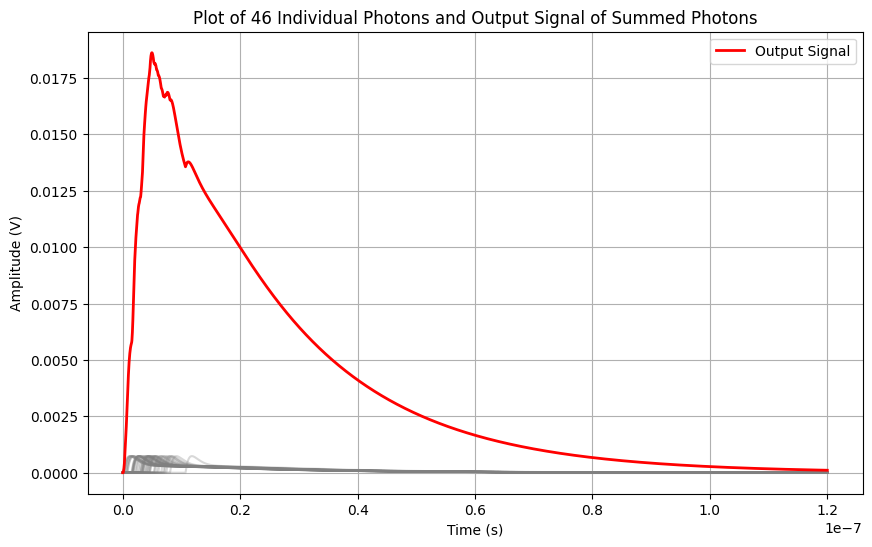

[ 3.40171601  2.74716688  0.98160958  5.92925211  0.05674336  5.67143428
  3.59303547  2.1933901   2.3496695   3.40448943  0.62768238  3.96801379
  5.96856826 10.31629918  4.1367895   3.50385136  2.35944738  0.93656195
  2.61584504  4.52280415  1.95717297  4.62506971  3.64878893  5.88925045
  2.77023905  2.81911628  0.51561056  1.4412426   3.03006444  1.36567098
  2.23598895  5.06493874  2.464029    4.6484794   6.7568818   4.77272414
  6.42446324  1.76118576  0.39709985  9.18486256  2.70365528  5.89898031
  3.50567311  3.98495471  6.32229359  4.3025031   0.93816291]


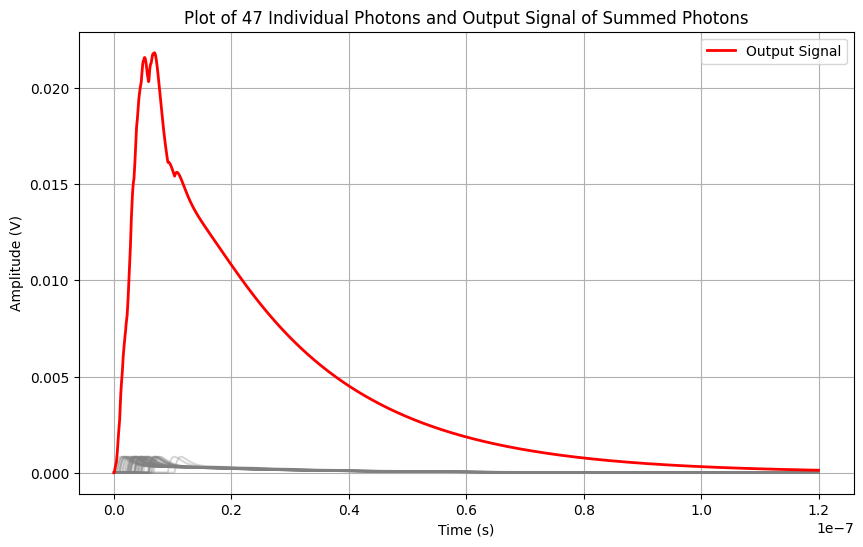

[ 1.71753343  9.71213919  2.46047385  5.75372533  5.42468974  2.77409858
  0.69853031  1.86865068  4.92421935  4.77704798  5.95305351  2.4282989
  0.5535028   1.82487057  5.12418926  2.02070264  2.14647119  1.0412896
  1.6101037   2.57540409  4.45176892  1.31806162  1.49339828  2.54127931
  2.52818816  9.27798293  6.87807385  1.64518738 11.5114317   5.7228026
  1.12299192 11.93429096  6.20929633  4.73343353  0.43381735  2.28952609
  6.61043814  3.41625739  3.40247104  1.04106457  1.87075549  2.44116527
  3.71560141  2.37127974  4.41536792  2.71224884  3.61578314  2.21887834]


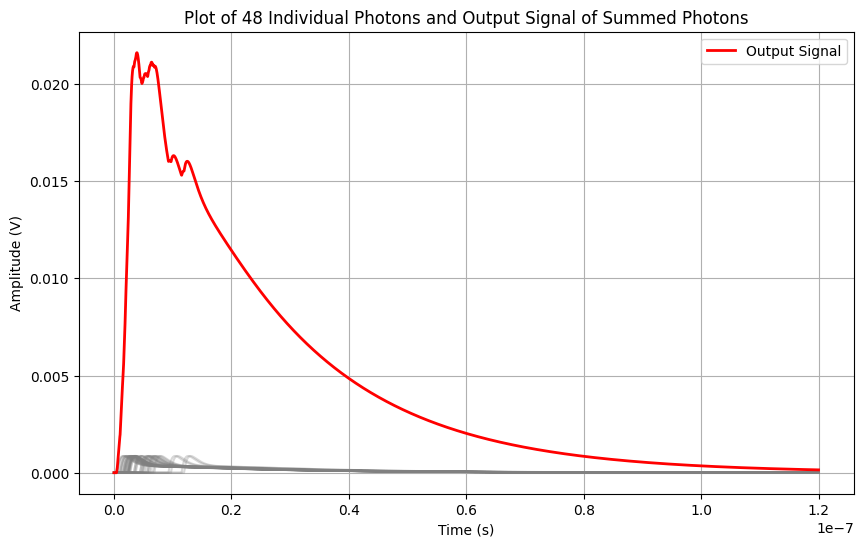

[ 5.35293469 13.75239043  2.01927007  3.0685423   1.76431208  3.90968785
  0.73409719  5.75640749  5.19702371  2.05228199 14.59830969  1.54326441
  4.92749813  1.841361    5.10169437  2.77300952  5.99018557  2.84414117
  3.21864206  7.12257477  2.67261162  1.8844388   4.75571762  5.98825471
  0.95823617  0.55125874  1.8075352   3.38021909  8.7370062   2.1923235
  7.15252104  1.39914369  4.00758994  6.12273492  1.12127006  4.14430709
  3.16242958  0.71838497  2.56717256  3.2719313   4.32949225  2.04351637
  4.85824905  2.4580394   0.80704176  0.89088411  8.86609242  2.11798135
  2.20663725]


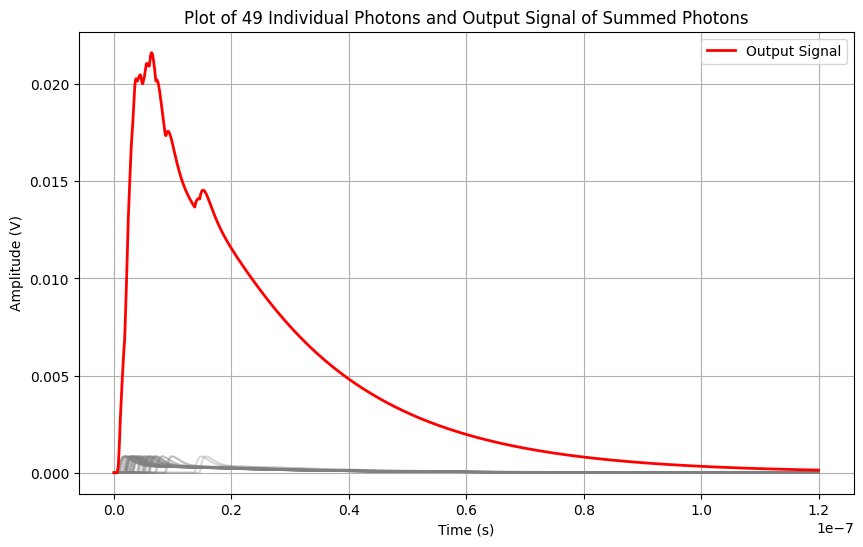

[ 1.69094153  1.0116671   4.05514157  5.95588423  3.12956108 10.92603976
  6.51454834  5.5698022   2.44879162  2.22953782  2.19028634  0.92567256
  2.33741879  1.05297861  2.72668839  0.57953573  6.93983806  2.69172156
  1.49139908  5.38006988  2.32553461  0.56539013  3.9670939   8.94978963
  9.5642167   2.70335884  2.78470865  1.2335715   1.88031632  2.89460481
  1.52732318  1.68319799  4.18789157  2.35198049  1.8442594   2.48591129
  4.17831262  1.56640821  2.91877526  2.49772337  2.01721799  1.6407549
  0.81767637  4.76647535  0.95099189  4.8473027   1.96390239  5.04291373
  4.67564653  1.22483931]


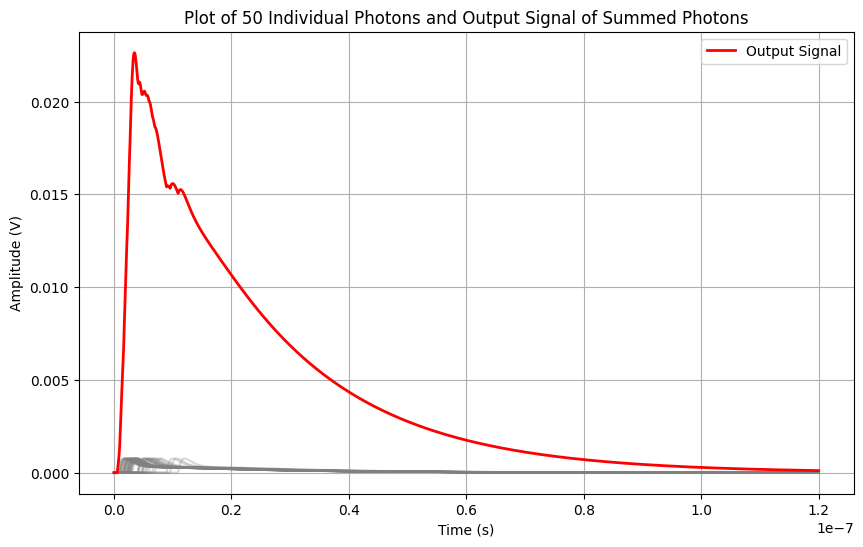

In [81]:
# Generate a sequence of numbers from 1 to 100
sequence = np.linspace(1, 50, 50)

# Convert the sequence to integers
photons_list = sequence.astype(int)

for n in photons_list:
    simulate_photon_data_combined(n)
